<a href="https://colab.research.google.com/github/eitanfass/hydrology-data-science/blob/main/hydrological%20comparison%20between%20Elat%2C%20Israel%20and%20Kuressaare%2C%20Estonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hydrology exercise 1  <br />
In This exercise i will make a hycdrological comparison bitween Elat, Israel and Kuressaare, Estonia.


<img align="left" width="500" height="300" src="https://images1.ynet.co.il/PicServer3/2014/02/24/5176184/5176177099082823449no.jpg">
<img align="right" width="500" height="300" src=https://i.pinimg.com/originals/de/1c/fe/de1cfe070e2e78cfb1fede99b6e2c73e.jpg>


In [ ]:
#adding all the librraries needed for the code
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from calendar import month_abbr
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import urllib.request
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

The following code's purpose to download the metorological data from the ncei website, save the data in a csv file and graph it.

In [ ]:
def download_data(station_name, station_code):#function that downloads data for a spcefic metorological staition and saves it in a csv file
    url_daily = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    url_monthly = 'https://www.ncei.noaa.gov/data/gsom/access/'
    # download daily data - uncomment the next 2 lines to make this work
    #urllib.request.urlretrieve(url_daily + station_code + '.csv',
                                #station_name + '_daily.csv')
    # download monthly data
    urllib.request.urlretrieve(url_monthly + station_code + '.csv', station_name + '_monthly.csv')

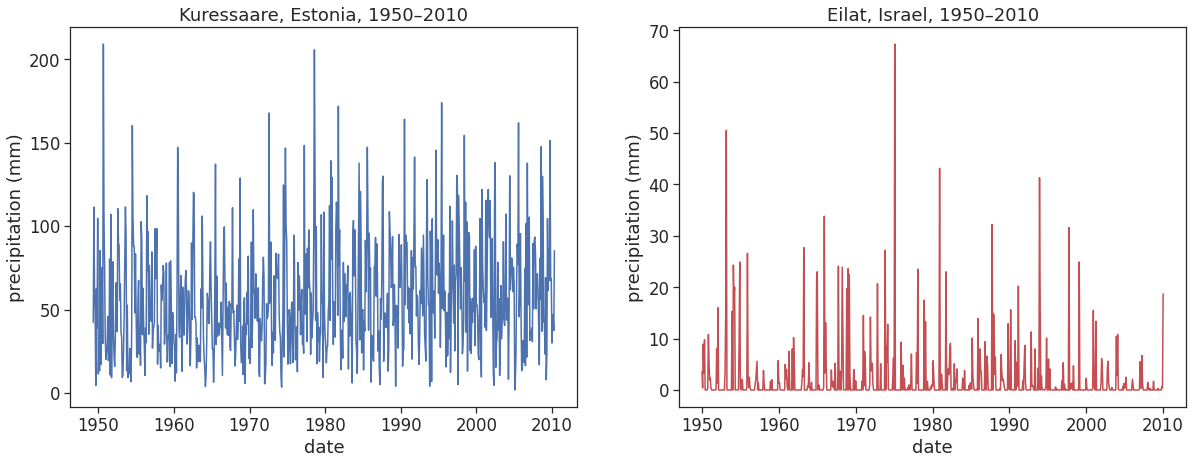

In [ ]:
download_data('ELAT,IS', 'IS000009972')
df_elat_full = pd.read_csv('ELAT,IS_monthly.csv', sep=",")
# make 'DATE' the dataframe index
df_elat_full['DATE'] = pd.to_datetime(df_elat_full['DATE'])
df_elat = df_elat_full.set_index('DATE')

df_elat=df_elat.loc['1950-01-01':'2010-01-01']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
ax2.plot(df_elat['PRCP'],color='r')
ax2.set_xlabel("date")
ax2.set_ylabel("precipitation (mm)")
ax2.set_title("Eilat, Israel, 1950–2010")

download_data('KURESSAARE, ESTONIA', 'ENE00175035')
df_ES_full = pd.read_csv('KURESSAARE, ESTONIA_monthly.csv', sep=",")
# make 'DATE' the dataframe index
df_ES_full['DATE'] = pd.to_datetime(df_ES_full['DATE'])
df_ES = df_ES_full.set_index('DATE')
#plt.plot(df_ES['PRCP'])

df_ES=df_ES.loc['1949-05-01':'2010-05-01']# allredy cuting the deta to get the hydrological year for 1950
ax1.plot(df_ES['PRCP'])
ax1.set_xlabel("date")
ax1.set_ylabel("precipitation (mm)")
ax1.set_title("Kuressaare, Estonia, 1950–2010");

The two graphs above represent the intra annual (monthly) precipitationin of both cities in the years 1950-2010, just by looking at the graphs we can notice the diffrence in the amounts of rain in each city. while Elat's largest precipitation in these 60 years is colse to 70 mm, in Kuressaareit 70 mm is an ordenery event and happens very often.<br />
#Intra-Annual precipitation
<br />
In this section we look deeper into the nature of the precipitation with in the year itself, the seasonality. The next tabels and graph shows us the monthly mean from the 60 yaers of data of both cities.


,monthly precipitation (mm)
month names,
Jan,3.583607
Feb,4.658333
Mar,4.085000
Apr,2.403333
May,1.151667
Jun,0.000000
Jul,0.000000
Aug,0.000000
Sep,0.010000


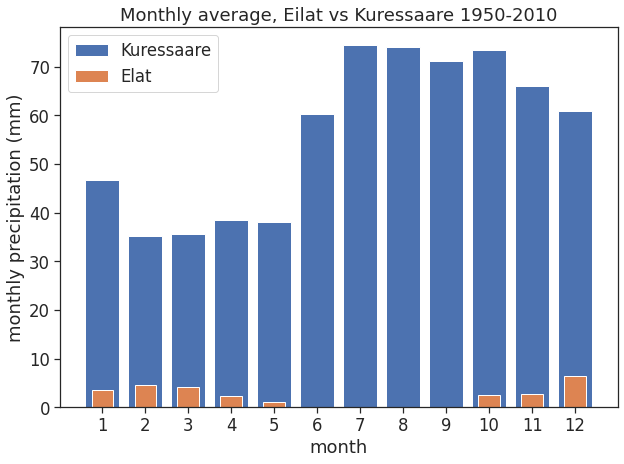

In [ ]:
# choose only the precipitation column
df_month_elat = df_elat['PRCP']
df_month_ES = df_ES['PRCP']

# calculate monthly mean
monthly_mean_elat = np.array([]) 
monthly_mean_ES = np.array([]) # empty array
month_numbers = np.arange(1,13)
month_numbers = np.arange(1,13)
month_names = [month_abbr[i] for i in month_numbers]

for m in month_numbers:      # cycle over months (1, 2, 3, etc)
    this_month_all_indices = (df_month_elat.index.month == m)       # indices in df_month belonging to month m
    this_month_mean = df_month_elat[this_month_all_indices].mean()  # this is the monthly mean
    monthly_mean_elat = np.append(monthly_mean_elat, this_month_mean)    # append

for m in month_numbers:      # cycle over months (1, 2, 3, etc)
    this_month_all_indices = (df_month_ES.index.month == m)       # indices in df_month belonging to month m
    this_month_mean = df_month_ES[this_month_all_indices].mean()  # this is the monthly mean
    monthly_mean_ES = np.append(monthly_mean_ES, this_month_mean)    # append

df_elat_si = pd.DataFrame({  'month names':month_names,
                             'month number':month_numbers,
                           'monthly precipitation (mm)':monthly_mean_elat
                            })
df_ES_si = pd.DataFrame({'month names':month_names,
                             'month number':month_numbers,
                         'monthly precipitation (mm)':monthly_mean_ES,
                            })
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(df_ES_si['month number'], df_ES_si['monthly precipitation (mm)'],label='Kuressaare')
ax.bar(df_elat_si['month number'], df_elat_si['monthly precipitation (mm)'],label='Elat',width=0.5)
ax.set(xlabel="month",
       ylabel="monthly precipitation (mm)",
       title="Monthly average, Eilat vs Kuressaare 1950-2010",
       xticks=np.arange(1,13));
ax.legend()
df_elat_si = df_elat_si.set_index('month names')
df_ES_si = df_ES_si.set_index('month names')
from IPython.display import display_html 


df1_styler = df_elat_si['monthly precipitation (mm)'].to_frame().style.set_table_attributes("style='display:inline'").set_caption('Elat')
df2_styler = df_ES_si['monthly precipitation (mm)'].to_frame().style.set_table_attributes("style='display:inline'").set_caption('Kuressaare')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)


By looking at the table and the barplot we can see that Elat, has a distinct wet season and a dry season while Kuressaare has rain fall all year long, but still has two distinct seasons June-November with high rain fall avarege and February-May with low rain fall average.


In [ ]:
def walsh_index(df):
    mi = df["monthly precipitation (mm)"]
    R = df["monthly precipitation (mm)"].sum()
    SI = np.sum(np.abs(mi - R/12)) / R
    return SI
Elat_SI = walsh_index(df_elat_si)
ES_SI = walsh_index(df_ES_si)

df_si = pd.DataFrame(columns=['SI'], 
                  index = ['Elat', 'Kuressaare'])
df_si['SI']=[Elat_SI,ES_SI]
df_si


,SI
Elat,0.748880
Kuressaare,0.257743


SI-Seasonality Index, Walsh and Lawler (1981)- the index detrmins wether or not there are defined seasons, values closer to 1 mean that there is a wet and dry season and lower values indicat that there diffrence between the seasons is less
 determind.
</br>
</br>
In our case we can se that Elat got a high SI value and the seasons are very defind by per, and Kuressaare got low SI values indicating that the soesons are less defind by precipitation.
</br>
#Annual Precipitation
In this section we will foucos on yearlly average and 30 year rolling avarege.
First we will fit the Data into hydroligical year, in Elat from september and in Kuressaare from May.
 

Text(0.5, 1.0, 'Annual mean Elat vs ES')

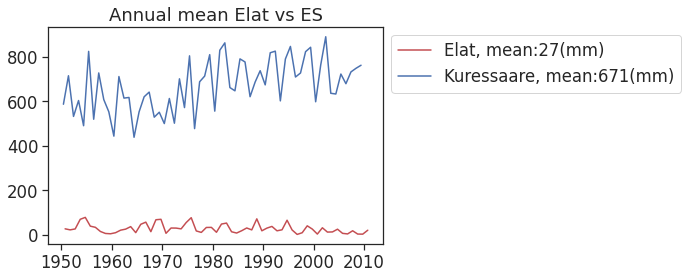

In [ ]:
# annual frequency, anchored 31 December
#df_month_all = df['PRCP'].resample('MS').sum().to_frame()
# annual frequency, anchored 01 January
#df_year_all = df['PRCP'].resample('AS').sum().to_frame()
# annual frequency, anchored end of September

df_year_Elat = df_elat['PRCP'].resample('A-SEP').sum().to_frame()
df_year_ES = df_ES['PRCP'].resample('A-MAY').sum().to_frame()
# rename 'PRCP' column to 'rain (mm)'
df_year_Elat.columns = ['rain (mm)']
df_year_ES.columns = ['rain (mm)']
#df_year_Elat = df_year_Elat.loc['1950-01-01':'2010-01-01']
df_year_ES = df_year_ES.loc['1950-05-01':'2010-05-01']
mean_elat=df_year_Elat['rain (mm)'].mean()
mean_ES=df_year_ES['rain (mm)'].mean()
plt.plot(df_year_Elat['rain (mm)'], label='Elat, mean:'+str(int(mean_elat))+'(mm)', color='r')
plt.plot(df_year_ES['rain (mm)'], label='Kuressaare, mean:'+str(int(mean_ES))+'(mm)',color='b')
plt.legend(bbox_to_anchor=(1,1), ncol=1)
plt.title('Annual mean Elat vs ES')



The above graph is a representation of the intra anual (yearly) total percipitation of both cities 1950-2010, here it is much easer to tell the diffrence in the two climates. Elat with 27 mm yearly average and Kuressaare with 669 mm yearly average.

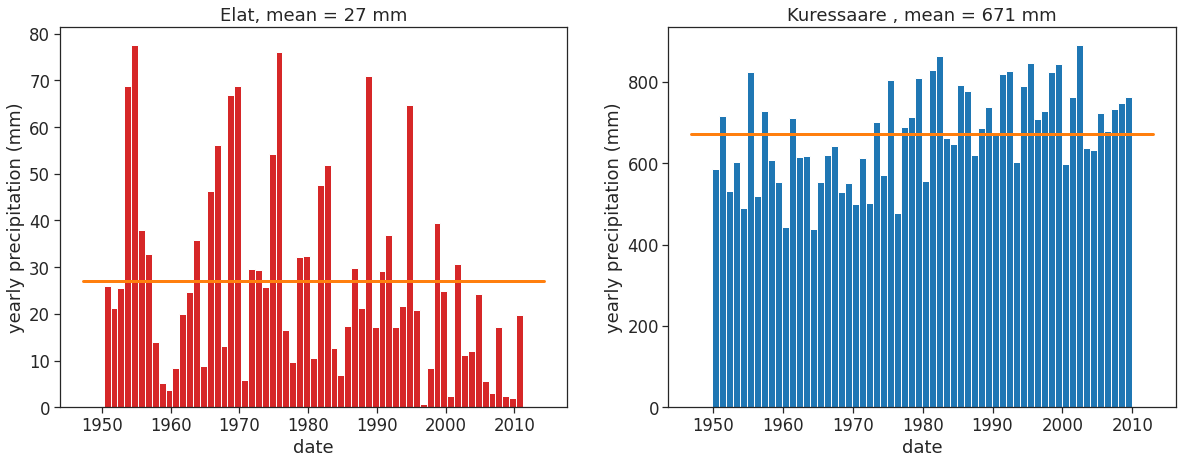

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

# plot YEARLY precipitation
ax1.bar(df_year_Elat.index, df_year_Elat['rain (mm)'],
       width=365, align='center', color="tab:red")

# plot mean
rain_mean = df_year_Elat['rain (mm)'].mean()
ax1.plot(ax1.get_xlim(), [rain_mean]*2, linewidth=3, color="tab:orange")
ax1.set(xlabel="date",
       ylabel="yearly precipitation (mm)",
       title=f"Elat, mean = {rain_mean:.0f} mm");
# save figure
#plt.savefig("hydrology_figures/beersheva_yearly_rainfall_1923_2016.png")
#collapse-hide

# plot YEARLY precipitation
ax2.bar(df_year_ES.index, df_year_ES['rain (mm)'],
       width=365, align='center', color="tab:blue")

# plot mean
rain_mean = df_year_ES['rain (mm)'].mean()
ax2.plot(ax2.get_xlim(), [rain_mean]*2, linewidth=3, color="tab:orange")
ax2.set(xlabel="date",
       ylabel="yearly precipitation (mm)",
       title=f"Kuressaare , mean = {rain_mean:.0f} mm");
# save figure
#plt.savefig("hydrology_figures/beersheva_yearly_rainfall_1923_2016.png")

Another representation of the Intra anual percipitatin in a bar plot and the mean in an orenge line.

Text(50, 8, 'CV Kuressaare = 0.17')

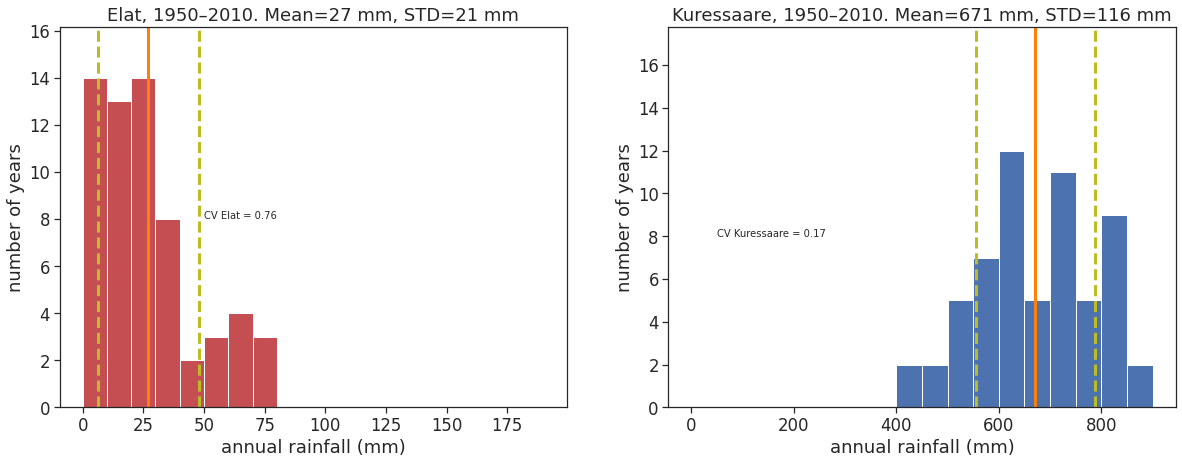

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

# calculate mean and standard deviation for elat
rain_mean = df_year_Elat['rain (mm)'].mean()
rain_std = df_year_Elat['rain (mm)'].std()

# plot histogram
b = np.arange(0, 200, 10)  # bins from 0 to 400, width = 50
ax1.hist(df_year_Elat['rain (mm)'], bins=b, color='r')

# plot vertical lines with mean, std, etc
ylim = np.array(ax1.get_ylim())
ylim[1] = ylim[1]*1.1
ax1.plot([rain_mean]*2, ylim, linewidth=3, color="tab:orange")
ax1.plot([rain_mean+rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax1.plot([rain_mean-rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax1.set(ylim=ylim,
       xlabel="annual rainfall (mm)",
       ylabel="number of years",
       title=f"Elat, 1950–2010. Mean={rain_mean:.0f} mm, STD={rain_std:.0f} mm")
ax1.text(50, 8, f"CV Elat = {rain_std/rain_mean:.2f}")


# calculate mean and standard deviation for estonia
rain_mean = df_year_ES['rain (mm)'].mean()
rain_std = df_year_ES['rain (mm)'].std()

# plot histogram
b = np.arange(0,950, 50)  # bins from 0 to 400, width = 50
ax2.hist(df_year_ES['rain (mm)'], bins=b, color='b')
ylim = np.array(ax1.get_ylim())
ylim[1] = ylim[1]*1.1
ax2.plot([rain_mean]*2, ylim, linewidth=3, color="tab:orange")
ax2.plot([rain_mean+rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax2.plot([rain_mean-rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax2.set(ylim=ylim,
       xlabel="annual rainfall (mm)",
       ylabel="number of years",
       title=f"Kuressaare, 1950–2010. Mean={rain_mean:.0f} mm, STD={rain_std:.0f} mm")
ax2.text(50, 8, f"CV Kuressaare = {rain_std/rain_mean:.2f}")

The Graph above shows us the distribution of percipitation in terms of years, we can see that in Kuressaare it is a normal distribution while in Elat it is a right-skewed distrebution.

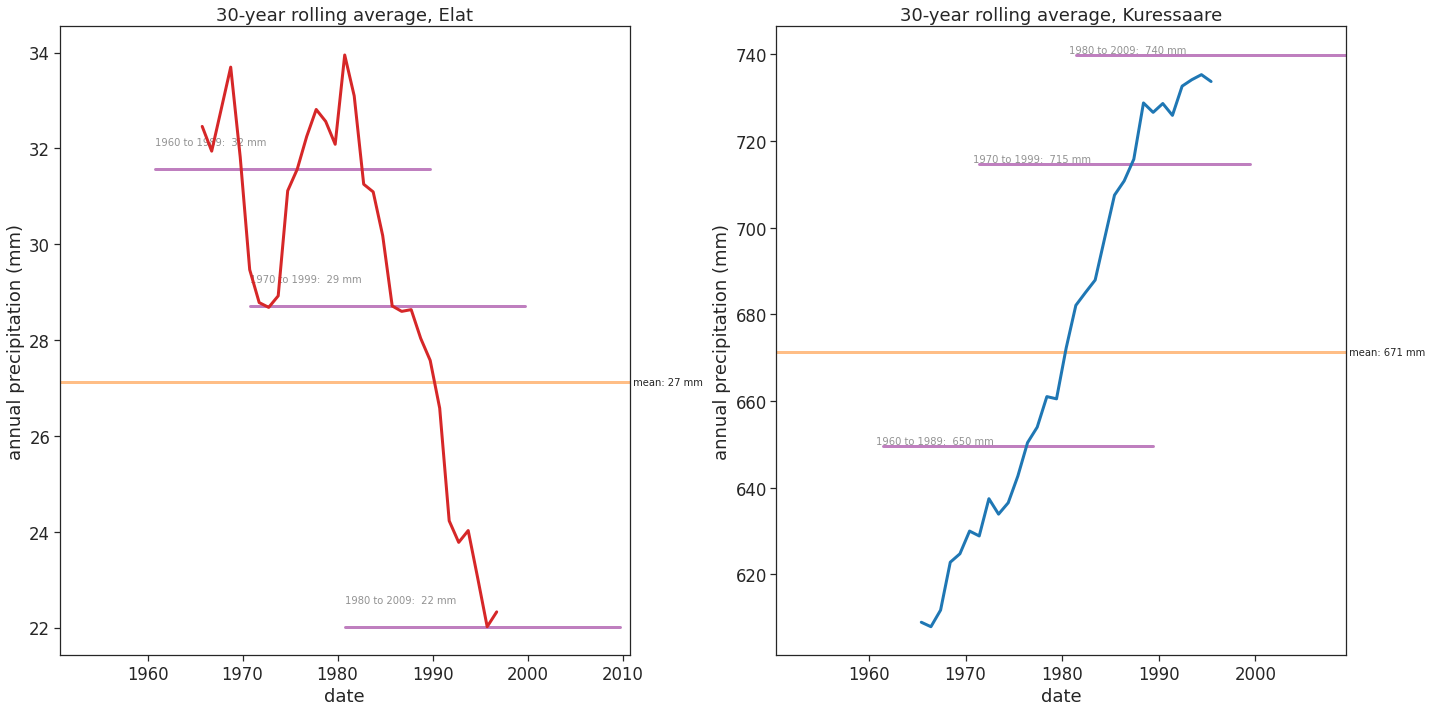

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

rolling_mean = df_year_Elat.rolling(30, center=True).mean()
ax1.plot(rolling_mean, linewidth=3, color="tab:red", zorder=5)

ax1.set_title("30-year rolling average, Elat")
ax1.set_xlabel("date")
ax1.set_ylabel("annual precipitation (mm)")

# windows of length 30 years
windows = [[x,x+29] for x in [1960,1970,1980]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year_Elat['rain (mm)'][start_date:end_date].mean()
    ax1.plot(df_year_Elat[start_date:end_date]*0+window_mean, color="purple", linewidth=3, alpha=0.5)
    ax1.text(start_date, window_mean+0.5, f"{window[0]} to {window[1]}:  {window_mean:.0f} mm", alpha=0.5)
#ax.set_ylim([480, 560])

# plot mean
rain_mean=df_year_Elat['rain (mm)'].mean()
ax1.plot(df_year_Elat*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax1.text(df_year_Elat.index[-1], rain_mean, f" mean: {rain_mean:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center")
ax1.set_xlim([df_year_Elat.index[0], df_year_Elat.index[-1]])





rolling_mean = df_year_ES.rolling(30, center=True).mean()
ax2.plot(rolling_mean, linewidth=3, color="tab:blue", zorder=5)

ax2.set_title("30-year rolling average, Kuressaare")
ax2.set_xlabel("date")
ax2.set_ylabel("annual precipitation (mm)")

# windows of length 30 years
windows = [[x,x+29] for x in [1960,1970,1980]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year_ES['rain (mm)'][start_date:end_date].mean()
    ax2.plot(df_year_ES[start_date:end_date]*0+window_mean, color="purple", linewidth=3, alpha=0.5)
    ax2.text(start_date, window_mean+0.5, f"{window[0]} to {window[1]}:  {window_mean:.0f} mm", alpha=0.5)
#ax.set_ylim([480, 560])

# plot mean
rain_mean=df_year_ES['rain (mm)'].mean()
ax2.plot(df_year_ES*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax2.text(df_year_ES.index[-1], rain_mean, f" mean: {rain_mean:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center")
ax2.set_xlim([df_year_ES.index[0], df_year_ES.index[-1]])
fig.tight_layout()


The 30 year rooling average is inorder to identify the trend, we can notice very clearly that Elat is getting drier with 10 mm diffrence in the rooling average in the last 60 years, a third of its original value. while Kuressare is getting more percipitation, with an increase of 100 mm in the past 60 years.

#Extreme Rainfall Events And Return Times
in this section we will look into the most extream weather events that occured in the ydears 1950-2010 in Elat and Kuressaare.

In [ ]:
def download_data(station_name, station_code):#function that downloads data for a spcefic metorological staition and saves it in a csv file
    url_daily = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    url_monthly = 'https://www.ncei.noaa.gov/data/gsom/access/'
    # download daily data - uncomment the next 2 lines to make this work
    urllib.request.urlretrieve(url_daily + station_code + '.csv',
                                station_name + '_daily.csv')
download_data('ELAT,IS', 'IS000009972')
df_elat = pd.read_csv('ELAT,IS_daily.csv', sep=",")
# make 'DATE' the dataframe index
df_elat['DATE'] = pd.to_datetime(df_elat['DATE'])
df_elat = df_elat.set_index('DATE')   
max_annual_elat = (df_elat['PRCP'].resample('A-JUL').max().to_frame())/10#finding the max daily percipitation in elat for each year

download_data('KURESSAARE, ESTONIA', 'ENE00175035')
df_elat = pd.read_csv('KURESSAARE, ESTONIA_daily.csv', sep=",")
# make 'DATE' the dataframe index
df_elat['DATE'] = pd.to_datetime(df_elat['DATE'])
df_elat = df_elat.set_index('DATE')   
max_annual_ES=(df_ES['PRCP'].resample('A-JUL').max().to_frame())


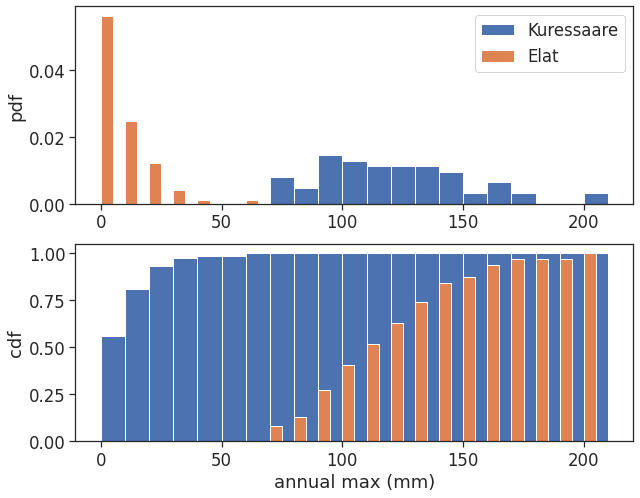

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

h1=max_annual_ES['PRCP'].values
h2=max_annual_elat['PRCP'].values

ax1.hist(h1, bins=np.arange(0,220,10), density=True, label='Kuressaare')
ax1.hist(h2, bins=np.arange(0,220,10), density=True, width=5,label='Elat')
ax2.hist(h2, bins=np.arange(0,220,10), cumulative=1, density=True)
ax2.hist(h1, bins=np.arange(0,220,10), cumulative=1, density=True, width=5)
ax1.legend()
ax1.set(ylabel="pdf")
ax2.set(xlabel="annual max (mm)",
        ylabel="cdf",
        );

The graph on top iד a adistrebution as we saw erlear but represnted as a probability density function meaning it has an area of 1. the botom graph is a cumulitive desity function of the top graph.
one minus the cumulitive graph tells us the propobility to get an event with x mm of rain.

In [ ]:
max_annual_elat = max_annual_elat.sort_values(by=['PRCP'], ascending=True)#sorting rain events for the graph
max_annual_ES= max_annual_ES.sort_values(by=['PRCP'], ascending=True)

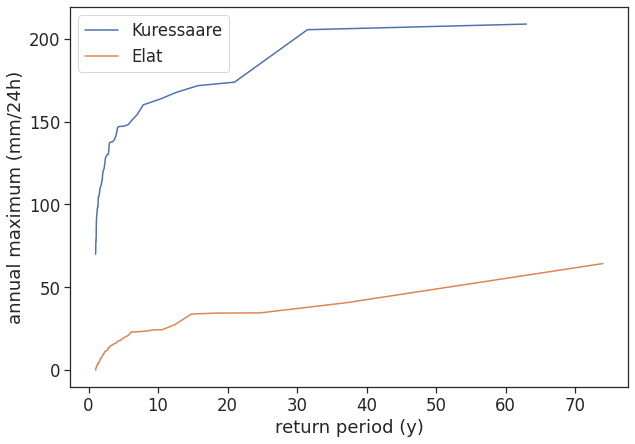

In [ ]:
max_annual_elat['rank'] = np.arange(1, len(max_annual_elat) + 1)
max_annual_ES['rank'] = np.arange(1, len(max_annual_ES) + 1)


n_elat = len(max_annual_elat['rank'])
m_elat = max_annual_elat['rank']
Pm_elat = m_elat / (n_elat+1)
Tr_elat = 1 / (1 - Pm_elat)
n_ES = len(max_annual_ES['rank'])
m_ES = max_annual_ES['rank']
Pm_ES = m_ES / (n_ES+1)
Tr_ES = 1 / (1 - Pm_ES)

fig, ax1 = plt.subplots(figsize=(10,7))

ax1.plot(Tr_ES, max_annual_ES['PRCP'],label='Kuressaare')
ax1.plot(Tr_elat, max_annual_elat['PRCP'],label='Elat',)

ax1.set(xlabel="return period (y)", ylabel="annual maximum (mm/24h)")
plt.legend()


If we calcute 1/probobility we will get the number of years needed for such annual maximum to occur, this curve is shown in the graph above

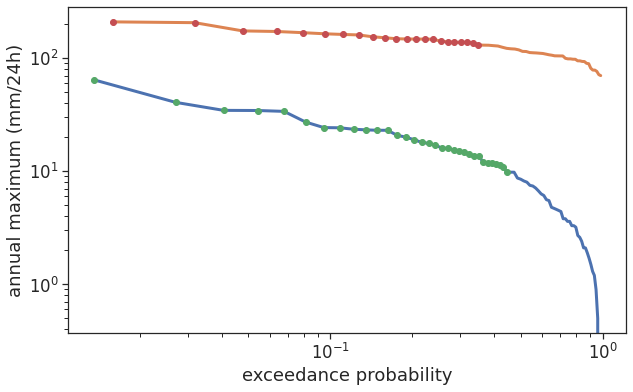

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

depth_elat = max_annual_elat['PRCP'].values
exc_prob_elat = (1-Pm_elat).values

depth_ES = max_annual_ES['PRCP'].values
exc_prob_ES = (1-Pm_ES).values

ax.plot(exc_prob_elat, depth_elat, lw=3)
ax.plot(exc_prob_ES, depth_ES, lw=3)

exclude = 40
depth_tofit_elat = depth_elat[exclude:]
exc_prob_tofit_elat = exc_prob_elat[exclude:]
ax.plot(exc_prob_tofit_elat, depth_tofit_elat, 'o')#ploting Elat's graph

depth_tofit_ES = depth_ES[exclude:]
exc_prob_tofit_ES = exc_prob_ES[exclude:]
ax.plot(exc_prob_tofit_ES, depth_tofit_ES, 'o')#ploting estonia's graph

ax.set(ylabel="annual maximum (mm/24h)",
       xlabel="exceedance probability",
       xscale="log",
       yscale="log",
      );



graph of the exedence probobility in a log scale for both axis, this will make it a linear if we exclude the right points of the graph. 
 

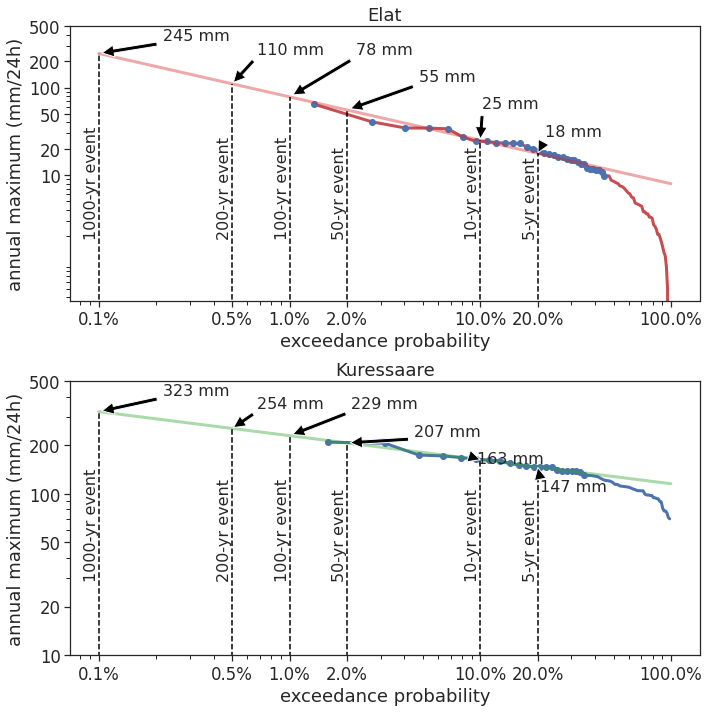

In [ ]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mtick

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10, 10))

ax1.plot(exc_prob_elat, depth_elat, lw=3, label="Weibull plotting position",color="r")
ax2.plot(exc_prob_ES, depth_ES, lw=3, label="Weibull plotting position",color="b")
ax1.set(ylabel="annual maximum (mm/24h)",
       xlabel="exceedance probability",title='Elat')
ax2.set(ylabel="annual maximum (mm/24h)",
       xlabel="exceedance probability",title='Kuressaare')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")

ax1.plot(exc_prob_tofit_elat, depth_tofit_elat, 'o')
ax2.plot(exc_prob_tofit_ES, depth_tofit_ES, 'o')

exc_prob_tofit_log_elat = np.log(exc_prob_tofit_elat)
depth_tofit_log_elat = np.log(depth_tofit_elat)
slope_elat, intercept_elat = np.polyfit(exc_prob_tofit_log_elat, depth_tofit_log_elat, 1)
exc_prob_tofit_log_ES = np.log(exc_prob_tofit_ES)
depth_tofit_log_ES = np.log(depth_tofit_ES)
slope_ES, intercept_ES = np.polyfit(exc_prob_tofit_log_ES, depth_tofit_log_ES, 1)

prob = [1e-3,1-1e-3]

def equation_elat(p):
    return np.exp(slope_elat*np.log(p) + intercept_elat)
def equation_ES(q):
    return np.exp(slope_ES*np.log(q) + intercept_ES)

ax1.plot(prob, equation_elat(prob), lw=3, color="tab:red", alpha=0.4)
ax2.plot(prob, equation_ES(prob), lw=3, color="tab:green", alpha=0.4)

one_in_x_years = np.array([5, 10, 50, 100, 200, 1000])

for y in one_in_x_years:
    ax1.plot([1/y]*2, [0, equation_elat(1/y)], color="black", ls="--")
    ax1.text(1/y, 2, f"{y}-yr event", rotation=90, ha="right", fontsize=16)
for z in one_in_x_years:
    ax2.plot([1/z]*2, [0, equation_ES(1/z)], color="black", ls="--")
    ax2.text(1/z, 30, f"{z}-yr event", rotation=90, ha="right", fontsize=16)

ax1.set_xticks([0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 1.0])
ax1.set_yticks([10, 20, 50, 100, 200, 500])
ax2.set_xticks([0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 1.0])
ax2.set_yticks([10, 20, 50, 100, 200, 500])

ax1.yaxis.set_major_formatter(ScalarFormatter())
ax1.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.1f}%'.format(y*100)))
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.1f}%'.format(y*100)))

ax1.annotate(f"{equation_elat(1/5):.0f} mm",
            xy=(1/5, equation_elat(1/5)), xycoords='data',
             xytext=(0.8, 0.6), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate(f"{equation_ES(1/5):.0f} mm",
            xy=(1/5, equation_ES(1/5)), xycoords='data',
             xytext=(0.8, 0.6), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equation_elat(1/10):.0f} mm",
            xy=(1/10, equation_elat(1/10)), xycoords='data',
             xytext=(0.7, 0.7), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate(f"{equation_ES(1/10):.0f} mm",
            xy=(1/10, equation_ES(1/10)), xycoords='data',
             xytext=(0.7, 0.7), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equation_elat(1/50):.0f} mm",
            xy=(1/50, equation_elat(1/50)), xycoords='data',
             xytext=(0.6, 0.8), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate(f"{equation_ES(1/50):.0f} mm",
            xy=(1/50, equation_ES(1/50)), xycoords='data',
             xytext=(0.6, 0.8), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equation_elat(1/100):.0f} mm",
            xy=(1/100, equation_elat(1/100)), xycoords='data',
             xytext=(0.5, 0.9), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate(f"{equation_ES(1/100):.0f} mm",
            xy=(1/100, equation_ES(1/100)), xycoords='data',
             xytext=(0.5, 0.9), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equation_elat(1/200):.0f} mm",
            xy=(1/200, equation_elat(1/200)), xycoords='data',
             xytext=(0.35, 0.9), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate(f"{equation_ES(1/200):.0f} mm",
            xy=(1/200, equation_ES(1/200)), xycoords='data',
             xytext=(0.35, 0.9), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate(f"{equation_elat(1/1000):.0f} mm",
            xy=(1/1000, equation_elat(1/1000)), xycoords='data',
             xytext=(0.2, 0.95), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate(f"{equation_ES(1/1000):.0f} mm",
            xy=(1/1000, equation_ES(1/1000)), xycoords='data',
             xytext=(0.2, 0.95), textcoords='axes fraction',
             fontsize=16, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
fig.tight_layout()

This graph is after excluding the right edge of the points and the linear fit is the predictor for larger events then recorded in our data.

#Summery
in this comparison we noticed several diffrences in the hydrological data for the two cities:
</br>

First we looked at the intra annual percipitation and we can now tell that Elat has a distinct wed and dry season while Kuressaare has a wet and wetter season.</br> 
Second we took a look at the annual percipitation, and we noutice that Elat has a highr stdv between the years and is getting drier over all. Kuressaare is with a lowes stdv and it has a positive trend in percipitation in the past 60 years.
</br>
Lastly we looked at extream weather events and calculated the exedence probobilty for an event of any size.